In [10]:
import numpy

array = numpy.linspace(4,23,43)

print (array[5])

6.2619047619


In [15]:
import numpy

ones_array = numpy.ones( (5,17) ) 

zeros_array = numpy.zeros( ones_array.shape )

print (zeros_array)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [20]:
import numpy
import math
p = 7
r = numpy.array([11.2, 4.7, 6.6])
print (r[1])
print(p/r[1])
x=math.sin(1.48936170213)
print (x**3)

4.7
1.48936170213
0.990091009642371


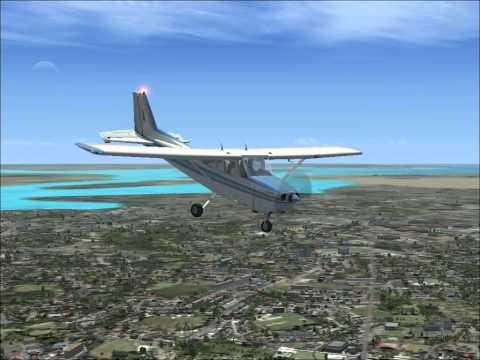

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('ysdU4mnRYdM')

In [6]:
%run phugoid.py
%matplotlib inline

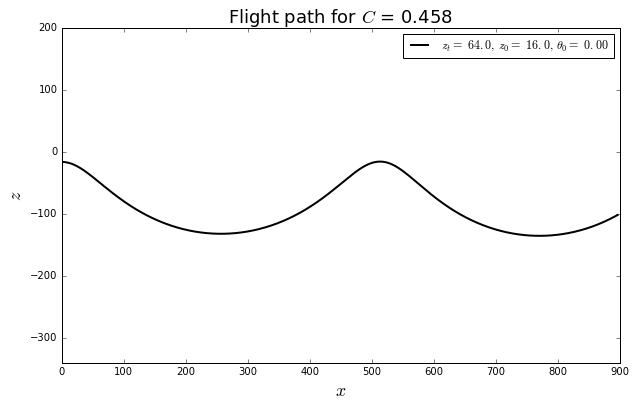

In [7]:
#zt = 64, z = 16, theta=0
plot_flight_path(64, 16, 0)

In [1]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = '../../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())

In [2]:
import numpy 
from matplotlib import pyplot
%matplotlib inline

In [13]:
T = 100.0
dt = 0.02
N = int(T/dt)+1
t = numpy.linspace(0.0, T, N)

array([  0.00000000e+00,   2.00000000e-02,   4.00000000e-02, ...,
         9.99600000e+01,   9.99800000e+01,   1.00000000e+02])

In [17]:
T=100.0
dt=0.02
t=numpy.arange(0,T+dt,dt)
N=len(t)

In [36]:
import numpy
T = 100.0
dt = 0.01
N = int(T/dt)+1
t = numpy.linspace(0.0, T, N)

In [37]:
# initial conditions
z0 = 100.  #altitude
b0  = 10.  #upward velocity resulting from gust
zt = 100.
g  = 9.81

u = numpy.array([z0, b0])

# initialize an array to hold the changing elevation values
z = numpy.zeros(N)
z[0] = z0 

In [38]:
# time-loop using Euler's method
for n in range(1,N):
    u = u + dt*numpy.array([u[1], g*(1-u[0]/zt)])
    z[n] = u[0]

In [39]:
import numpy 
from matplotlib import pyplot
%matplotlib inline

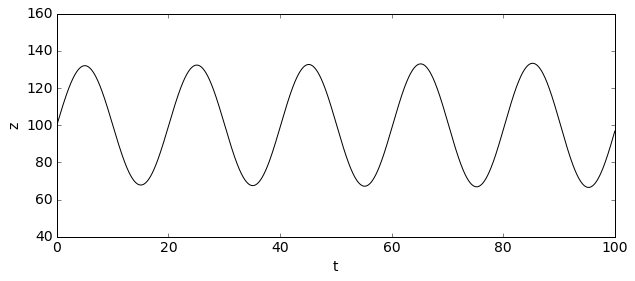

In [40]:
pyplot.figure(figsize=(10,4))   #set plot size
pyplot.ylim(40,160)             #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t', fontsize=14) #x label
pyplot.ylabel('z', fontsize=14) #y label
pyplot.plot(t,z, 'k-');

In [41]:
z_exact = b0*(zt/g)**.5*numpy.sin((g/zt)**.5*t)+\
(z0-zt)*numpy.cos((g/zt)**.5*t)+zt

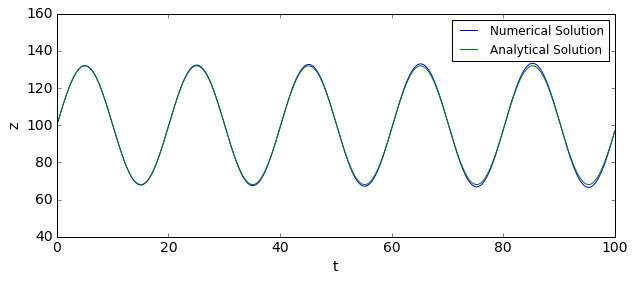

In [42]:
pyplot.figure(figsize=(10,4))
pyplot.ylim(40,160)             #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t', fontsize=14) #x label
pyplot.ylabel('z', fontsize=14) #y label
pyplot.plot(t,z)
pyplot.plot(t, z_exact)
pyplot.legend(['Numerical Solution','Analytical Solution']);

In [48]:
# time-increment array
dt_values = numpy.array([0.1, 0.05, 0.01, 0.005, 0.001, 0.0001])

# array that will contain solution of each grid
z_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    N = int(T/dt)+1    # number of time-steps
    ### discretize the time using numpy.linspace() ###
    t = numpy.linspace(0.0, T, N)

    # initial conditions
    u = numpy.array([z0, b0])
    z = numpy.empty_like(t)
    z[0] = z0
    
    # time loop - Euler method
    for n in range(1,N):
        ### compute next solution using Euler method ###
        u = u + dt*numpy.array([u[1], g*(1-u[0]/zt)])
        z[n] = u[0]   # store the elevation at time-step n+1
    
    z_values[i] = z.copy()    # store the total elevation calculation grid i

In [49]:
def get_error(z, dt):
    """Returns the error relative to analytical solution using L-1 norm.
    
    Parameters
    ----------
    z : array of float
        numerical solution.
    dt : float
        time increment.
        
    Returns
    -------
    err : float
        L_{1} norm of the error with respect to the exact solution.
    """
    N = len(z)
    t = numpy.linspace(0.0, T, N)
    
    z_exact = b0*(zt/g)**.5*numpy.sin((g/zt)**.5*t)+\
                (z0-zt)*numpy.cos((g/zt)**.5*t)+zt
    
    return dt * numpy.sum(numpy.abs(z-z_exact))

In [50]:
error_values = numpy.empty_like(dt_values)

for i, dt in enumerate(dt_values):
    ### call the function get_error() ###
    error_values[i] = get_error(z_values[i], dt)

(0.0001, 0.10000000000000001, 0.10000000000000001, 1000.0)

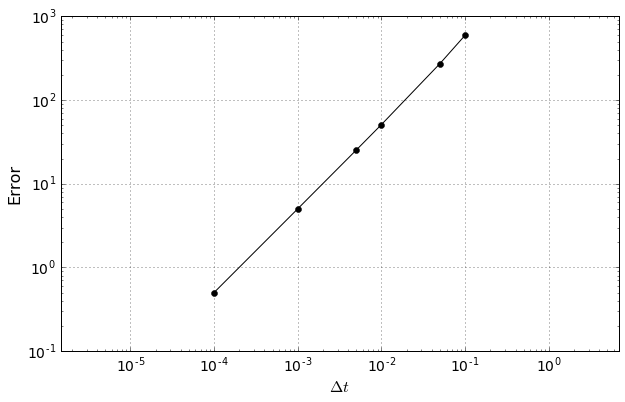

In [51]:
pyplot.figure(figsize=(10, 6))
pyplot.tick_params(axis='both', labelsize=14) #increase tick font size
pyplot.grid(True)                         #turn on grid lines
pyplot.xlabel('$\Delta t$', fontsize=16)  #x label
pyplot.ylabel('Error', fontsize=16)       #y label
pyplot.loglog(dt_values, error_values, 'ko-')  #log-log plot
pyplot.axis('equal')                      #make axes scale equally;

In [54]:
def Euler_error(T,dt,z0,b0,zt,g):
    import numpy
    # time-increment array
    dt_values = numpy.array([0.1, 0.05, 0.01, 0.005, 0.001, 0.0001])

    # array that will contain solution of each grid
    z_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

    for i, dt in enumerate(dt_values):
        N = int(T/dt)+1    # number of time-steps
        ### discretize the time using numpy.linspace() ###
        t = numpy.linspace(0.0, T, N)

        # initial conditions
        u = numpy.array([z0, b0])
        z = numpy.empty_like(t)
        z[0] = z0
    
        # time loop - Euler method
        for n in range(1,N):
            ### compute next solution using Euler method ###
            u = u + dt*numpy.array([u[1], g*(1-u[0]/zt)])
            z[n] = u[0]   # store the elevation at time-step n+1
    
        z_values[i] = z.copy()    # store the total elevation calculation grid i
    
    def get_error(z, dt):
        """Returns the error relative to analytical solution using L-1 norm.
    
        Parameters
        ----------
        z : array of float
            numerical solution.
        dt : float
            time increment.
        
        Returns
        -------
        err : float
            L_{1} norm of the error with respect to the exact solution.
        """
        N = len(z)
        t = numpy.linspace(0.0, T, N)
    
        z_exact = b0*(zt/g)**.5*numpy.sin((g/zt)**.5*t)+\
                    (z0-zt)*numpy.cos((g/zt)**.5*t)+zt
    
        return dt * numpy.sum(numpy.abs(z-z_exact))
    
    error_values = numpy.empty_like(dt_values)

    for i, dt in enumerate(dt_values):
        ### call the function get_error() ###
        error_values[i] = get_error(z_values[i], dt)
            
    pyplot.figure(figsize=(10, 6))
    pyplot.tick_params(axis='both', labelsize=14) #increase tick font size
    pyplot.grid(True)                         #turn on grid lines
    pyplot.xlabel('$\Delta t$', fontsize=16)  #x label
    pyplot.ylabel('Error', fontsize=16)       #y label
    pyplot.loglog(dt_values, error_values, 'ko-')  #log-log plot
    pyplot.axis('equal')                      #make axes scale equally;

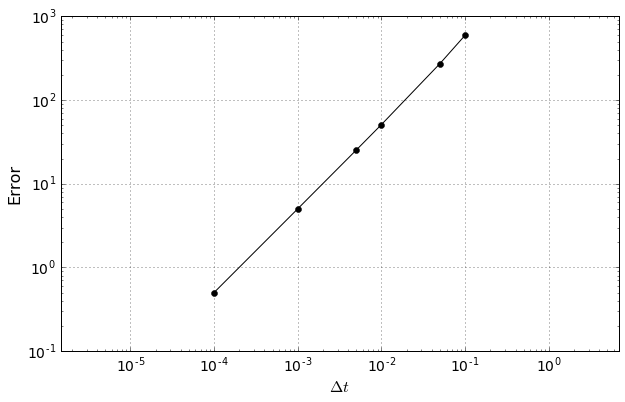

In [55]:
T = 100.0
dt = 0.01
z0 = 100.  #altitude
b0  = 10.  #upward velocity resulting from gust
zt = 100.
g  = 9.81
Euler_error(T,dt,z0,b0,zt,g)

In [56]:
#part with drag

In [57]:
def euler_step(u, f, dt):
    return u + dt * f(u)

In [58]:
from math import sin, cos, log, ceil
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16